In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/AMZN_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  6846


Summary Statistics:
                                 Date         Open         High          Low  \
count                           6846  6846.000000  6846.000000  6846.000000   
mean   2010-12-21 09:15:30.762489088    37.360464    37.801009    36.882561   
min              1997-05-15 00:00:00     0.070313     0.072396     0.065625   
25%              2004-03-05 18:00:00     2.070125     2.120625     2.040156   
50%              2010-12-20 12:00:00     8.574500     8.666750     8.466500   
75%              2017-10-08 06:00:00    50.453876    50.723249    50.059875   
max              2024-07-30 00:00:00   200.089996   201.199997   199.050003   
std                              NaN    53.756955    54.366449    53.087051   

             Close    Adj Close        Volume  Dividends  Stock Splits  
count  6846.000000  6846.000000  6.846000e+03     6846.0   6846.000000  
mean     37.351096    37.351096  1.380713e+08        0.0      0.003944  
min       0.069792     0.069792  9.744000e+06   

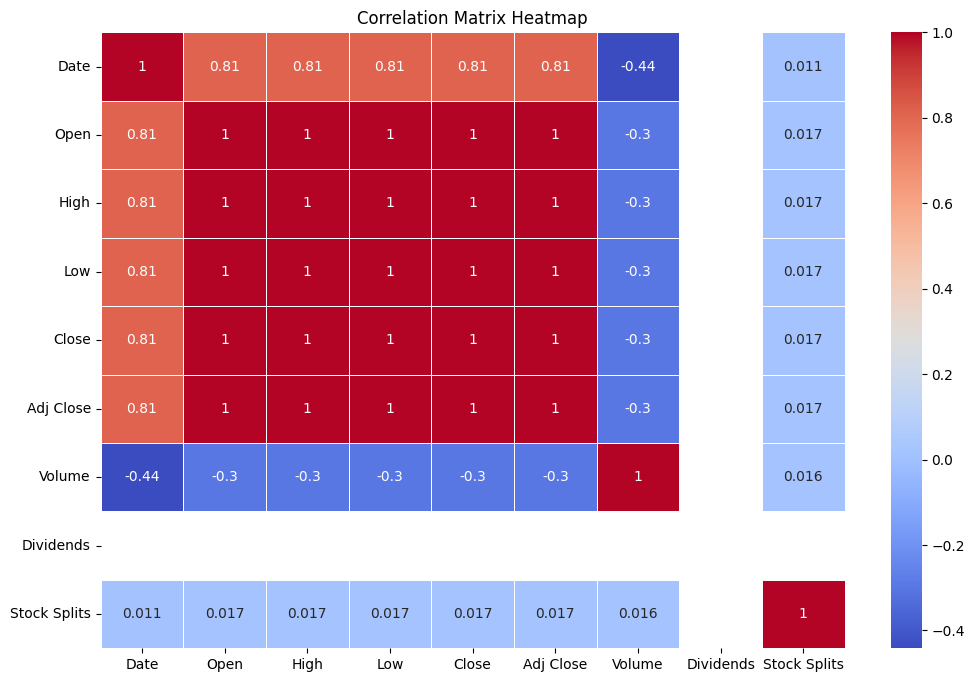

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
5777 2020-04-30  120.991997  123.750000  119.800499  123.699997  123.699997   
5791 2020-05-20  123.893501  125.000504  123.363503  124.897003  124.897003   
5798 2020-06-01  122.400002  123.846497  122.208504  123.552002  123.552002   
5799 2020-06-02  123.349998  123.676498  122.265503  123.620499  123.620499   
5800 2020-06-03  123.400497  124.400002  123.058502  123.919998  123.919998   
...         ...         ...         ...         ...         ...         ...   
6841 2024-07-24  183.199997  185.449997  180.410004  180.830002  180.830002   
6842 2024-07-25  182.910004  183.899994  176.800003  179.850006  179.850006   
6843 2024-07-26  180.389999  183.190002  180.240005  182.500000  182.500000   
6844 2024-07-29  183.839996  184.750000  182.380005  183.199997  183.199997   
6845 2024-07-30  184.720001  185.860001  179.380005  181.710007  181.710007   

         Volume  Divid

In [2]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

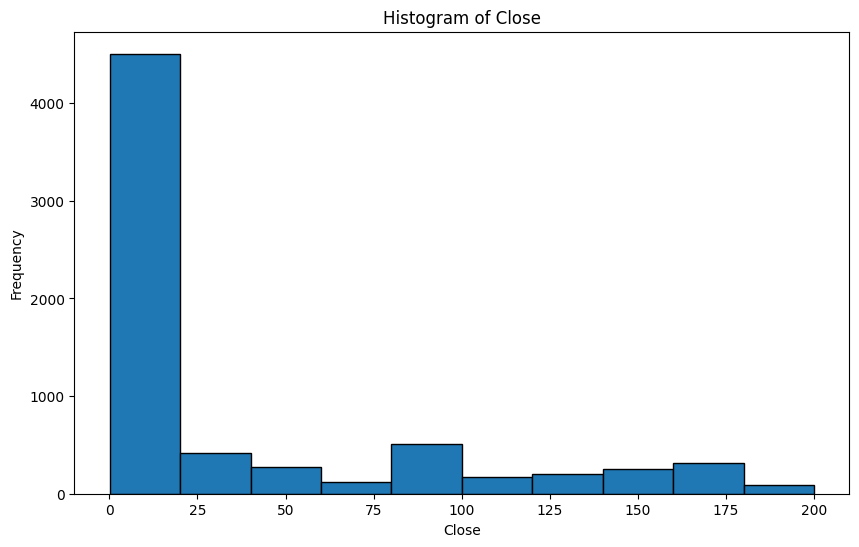

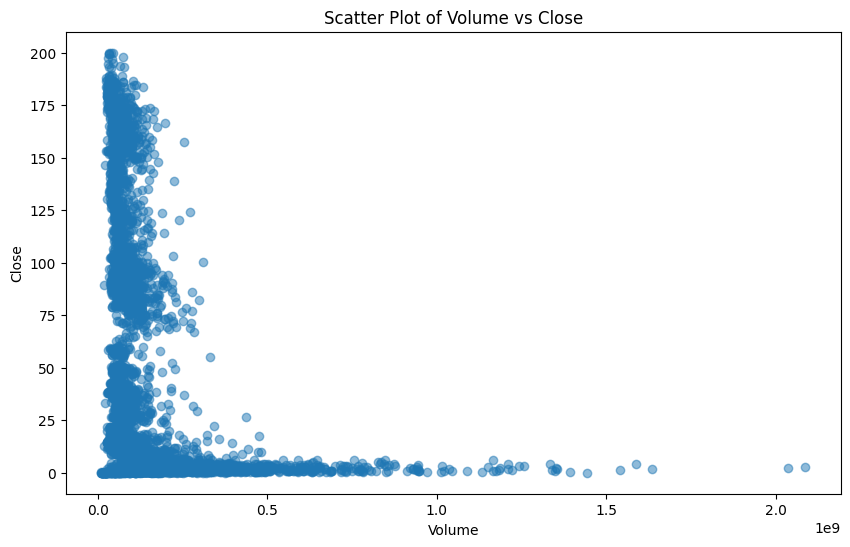

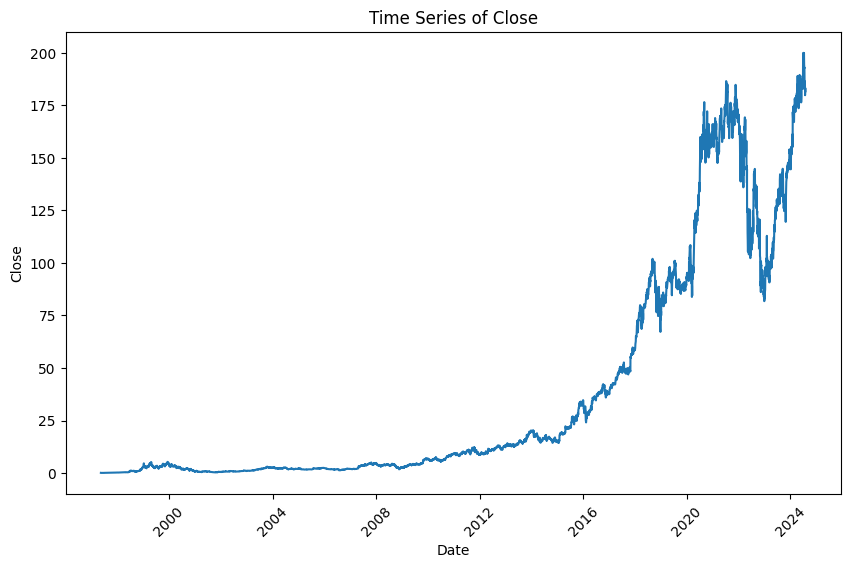

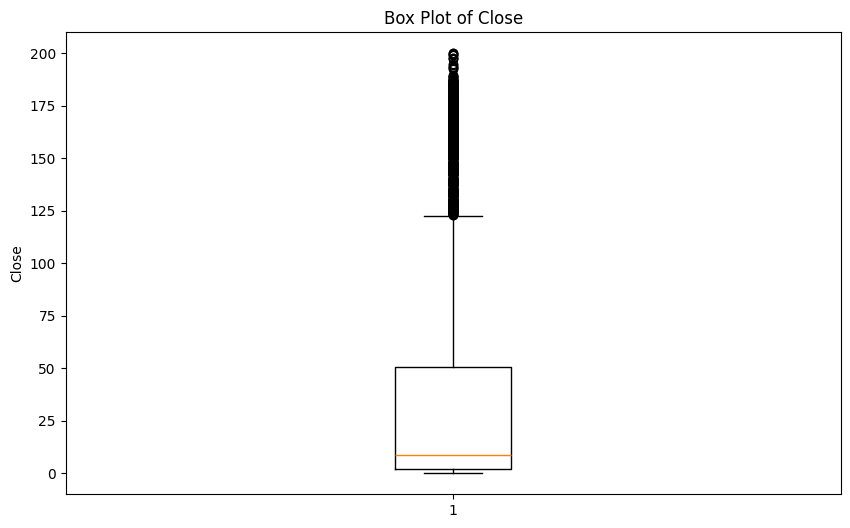

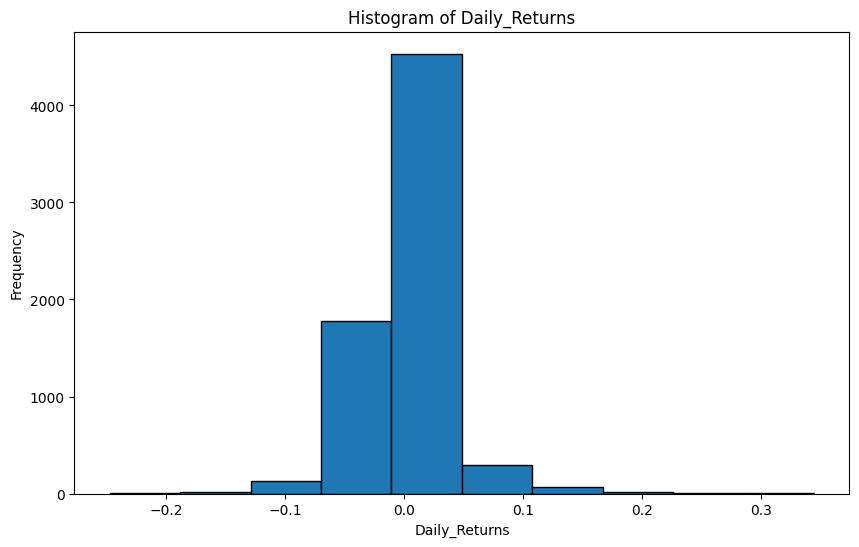

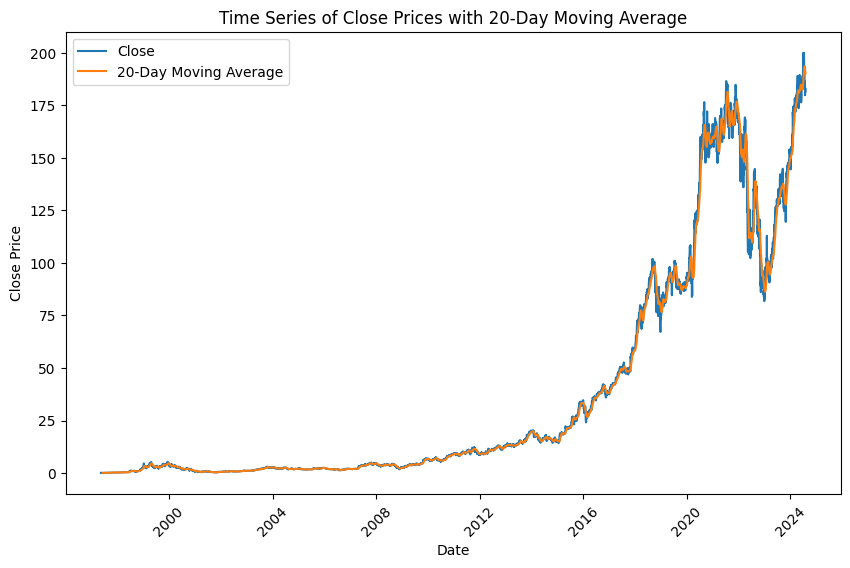

In [3]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
